In [3]:
# Importação das bibliotecas
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.formatter.useoffset':'False'}
plt.rcParams.update(params)
import matplotlib.dates as mdates
import plotly.express as px
from itertools import cycle, islice
import seaborn as srn

In [4]:
# Lendo o arquivo contendo os novos casos, total de casos, total de mortes, novas mortes, etc.
dados = pd.read_csv("owid-covid-data.csv", sep=",")
dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)
srn.set_style('whitegrid')

In [40]:
## Resgatando apenas os dados do Brasil.
dados_brasil = pd.DataFrame(data=dados.loc[dados['location'] == 'Brazil'])
dados_brasil.loc[:,'date'] = pd.to_datetime(dados_brasil.loc[:,'date'])
dados_brasil["day"] = dados_brasil["date"].dt.day
dados_brasil["month"] =dados_brasil["date"].dt.month
dados_brasil["year"] = dados_brasil["date"].dt.year
dados_brasil["month_name"] = pd.to_datetime(dados_brasil['month'], format='%m').dt.month_name().str.slice(stop=3)
dados_brasil["month_year"] = dados_brasil['month_name'] + '/' +(dados_brasil['year']).astype(str)

dados_brasil_agrupado = dados_brasil.groupby(['year','month']).mean().reset_index()
dados_brasil_agrupado['month'] = pd.to_datetime(dados_brasil_agrupado['month'], format='%m').dt.month_name().str.slice(stop=3)
dados_brasil_agrupado["month_year"] = dados_brasil_agrupado['month'] + '/' +(dados_brasil_agrupado['year']).astype(str)


In [41]:
dados_brasil

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day,month,year,month_name,month_year
9330,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,26,2,2020,Feb,Feb/2020
9331,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,27,2,2020,Feb,Feb/2020
9332,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,28,2,2020,Feb,Feb/2020
9333,BRA,South America,Brazil,2020-02-29,2.0,1.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,29,2,2020,Feb,Feb/2020
9334,BRA,South America,Brazil,2020-03-01,2.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,1,3,2020,Mar,Mar/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,BRA,South America,Brazil,2021-02-27,10517232.0,61602.0,54012.000,254221.0,1386.0,1177.714,...,17.9,0.0,2.2,75.88,0.765,27,2,2021,Feb,Feb/2021
9698,BRA,South America,Brazil,2021-02-28,10551259.0,34027.0,54726.429,254942.0,721.0,1205.429,...,17.9,0.0,2.2,75.88,0.765,28,2,2021,Feb,Feb/2021
9699,BRA,South America,Brazil,2021-03-01,10587001.0,35742.0,55977.286,255720.0,778.0,1225.286,...,17.9,0.0,2.2,75.88,0.765,1,3,2021,Mar,Mar/2021
9700,BRA,South America,Brazil,2021-03-02,10646926.0,59925.0,55578.714,257361.0,1641.0,1261.714,...,17.9,0.0,2.2,75.88,0.765,2,3,2021,Mar,Mar/2021


In [42]:
dados_brasil_agrupado

,year,month,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,day,month_year
0,2020,Feb,1.250000e+00,0.500000,0.000000,0.000000,0.000000,0.000000,0.006000,0.002500,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,27.5,Feb/2020
1,2020,Mar,1.197645e+03,184.354839,126.290323,31.483871,6.483871,3.847903,5.634387,0.867323,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,16.0,Mar/2020
2,2020,Apr,3.495020e+04,2715.666667,2174.323800,2219.033333,193.500000,154.366667,164.425533,12.776033,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,15.5,Apr/2020
3,2020,May,2.562673e+05,13795.548387,12030.479290,16420.322581,751.870968,705.580645,1205.626452,64.902032,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,16.0,May/2020
4,2020,Jun,9.387074e+05,29573.066667,28691.100033,45113.066667,1009.333333,1004.757133,4416.211933,139.128433,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,15.5,Jun/2020
5,2020,Jul,2.020705e+06,40659.483871,38913.626710,76466.967742,1060.677419,1042.027677,9506.543774,191.285226,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,16.0,Jul/2020
6,2020,Aug,3.319481e+06,40186.677419,41502.576097,107916.290323,932.451613,974.133645,15616.718742,189.060935,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,16.0,Aug/2020
7,2020,Sep,4.401999e+06,30088.766667,31245.023833,133478.400000,752.366667,750.257200,20709.498333,141.554633,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,15.5,Sep/2020
8,2020,Oct,5.193275e+06,23376.451613,23626.709710,152670.612903,513.935484,538.433258,24432.112710,109.976097,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,16.0,Oct/2020
9,2020,Nov,5.894581e+06,26675.766667,25763.057167,166210.633333,441.200000,445.566633,27731.450333,125.497967,...,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,15.5,Nov/2020


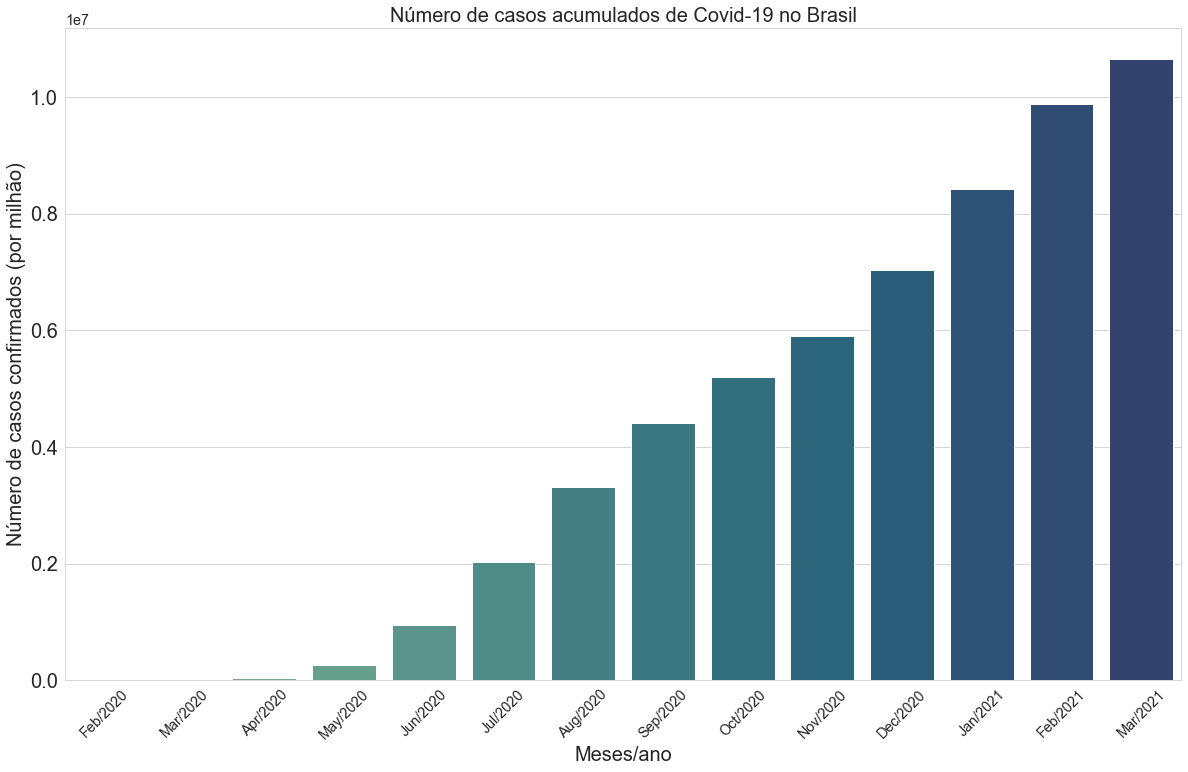

In [26]:
# Barplot -> Número de casos acumulados de Covid-19 no Brasil
fig = plt.figure(figsize = (20, 12)) 

srn.barplot(x = 'month_year',y = 'total_cases', data=dados_brasil_agrupado, palette="crest")

plt.title("Número de casos acumulados de Covid-19 no Brasil", fontsize=20)
plt.xlabel("Meses/ano", fontsize=20)
plt.ylabel("Número de casos confirmados (por milhão)", fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.show()



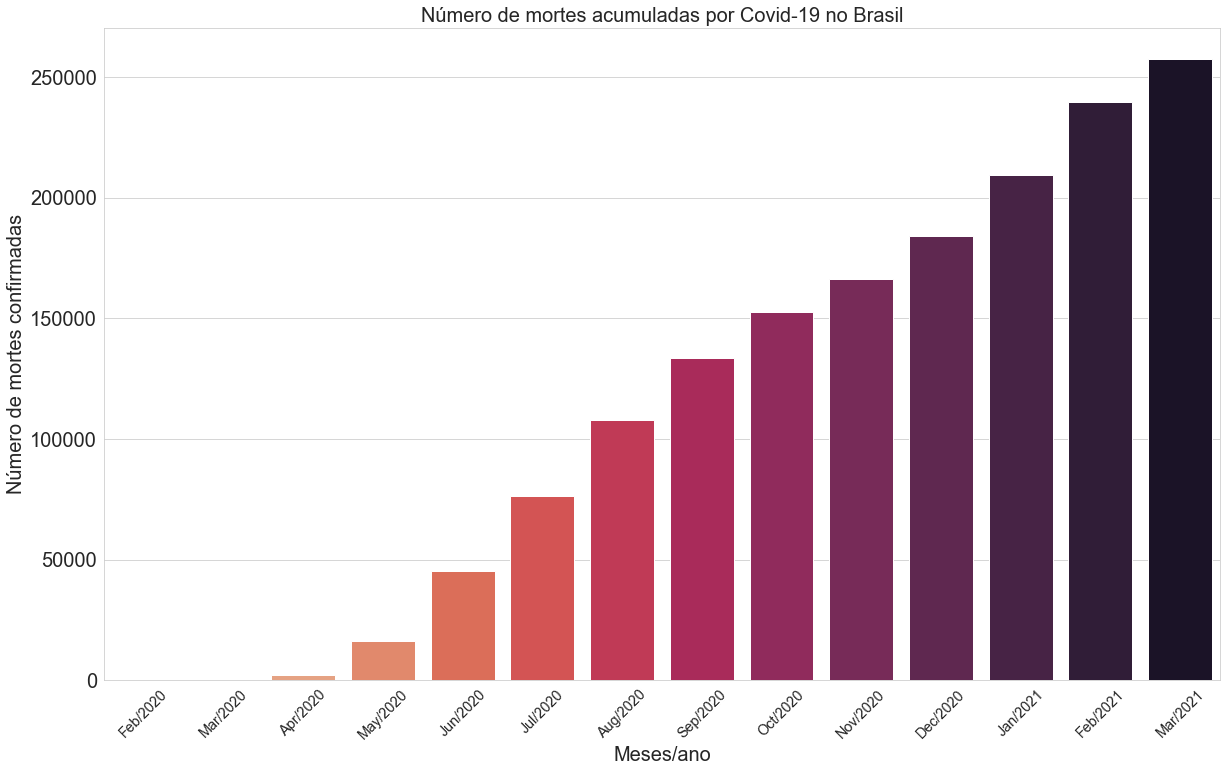

In [31]:
# Barplot -> Número de mortes acumuladas de Covid-19 no Brasil
fig = plt.figure(figsize = (20, 12)) 
srn.barplot(x = 'month_year',y = 'total_deaths', data=dados_brasil_agrupado, palette="rocket_r")
plt.xticks(rotation=45)
plt.title("Número de mortes acumuladas por Covid-19 no Brasil", fontsize=20)
plt.xlabel("Meses/ano", fontsize=20)
plt.ylabel("Número de mortes confirmadas", fontsize=20)
plt.yticks(fontsize=20)
plt.show()



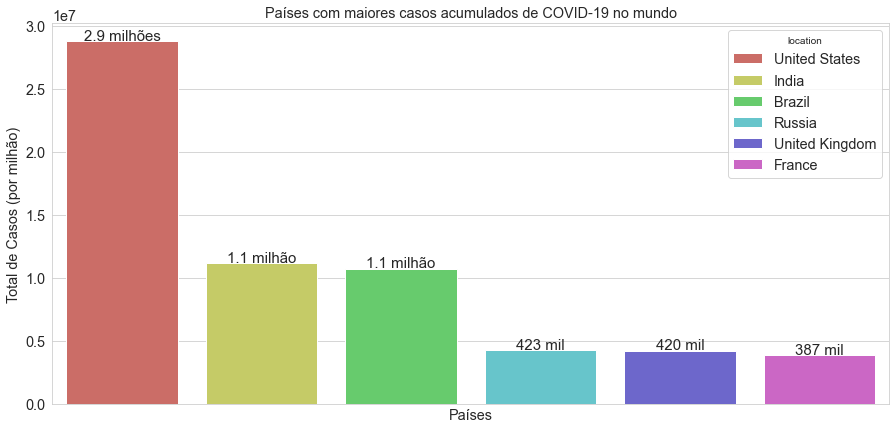

In [34]:
# Barplot -> Países com maiores números de casos de Covid-19.

maiores_casos = dados.loc[(dados['date'] == '2021-03-03')]
maiores_casos = maiores_casos.loc[~maiores_casos['iso_code'].str.contains("OWID")]
maiores_casos = maiores_casos.sort_values(by = "total_cases", ascending=False).head(6)

srn.barplot(x = "location", y = "total_cases", data=maiores_casos, hue="location", dodge=False, palette = 'hls')


for index,data in enumerate(maiores_casos['total_cases']):    
    if (data >= 10**7 and data <= ((10**7)*2)):
        plt.text(x=index, y =data+100000 , s='{:2.2} milhão'.format(data/10**7), fontdict=dict(fontsize=15), ha='center')
    elif(data >= 10**):
         plt.text(x=index, y =data+100000 , s='{:2.2} milhões'.format(data/10**7), fontdict=dict(fontsize=15), ha='center')
    else:
        plt.text(x=index, y =data+100000 , s=f"{int(data/10000)} mil", fontdict=dict(fontsize=15), ha='center') 
        
        
        
        
plt.xticks([])
plt.xlabel("Países")
plt.ylabel("Total de Casos (por milhão)")
plt.title("Países com maiores casos acumulados de COVID-19 no mundo")
plt.show()


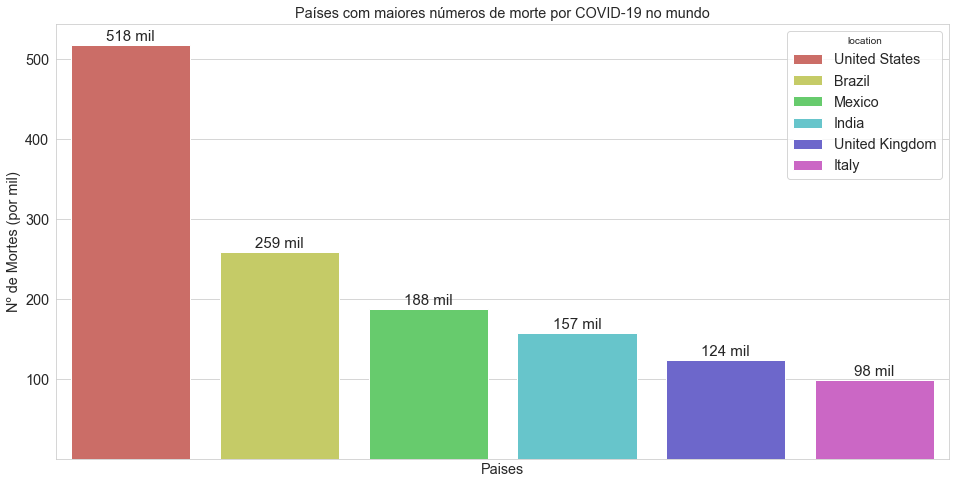

In [35]:
# Barplot -> países com maiores números de morte por Covid-19.

# Gerando dataframe
maiores_tmorte = dados.loc[(dados['date'] == '2021-03-03')]
maiores_tmorte = maiores_tmorte.loc[~maiores_tmorte['iso_code'].str.contains("OWID")]
maiores_tmorte = maiores_tmorte.sort_values(by = "total_deaths", ascending=False).head(6)


## Gerando o gráfico
fig = plt.figure(figsize = (16, 8)) 
srn.barplot(x = "location", y = "total_deaths", data=maiores_tmorte, hue="location", dodge=False, palette = 'hls')


  
plt.xticks([])
plt.yticks([100000,200000,300000,400000,500000],['100','200','300','400','500'])
plt.xlabel("Paises")
plt.ylabel("Nº de Mortes (por mil)")
plt.title("Países com maiores números de morte por COVID-19 no mundo")


for index,data in enumerate(maiores_tmorte['total_deaths']):
    plt.text(x=index, y =data+5000 , s=f"{int(data/1000)} mil", fontdict=dict(fontsize=15), ha='center')
    

plt.show()


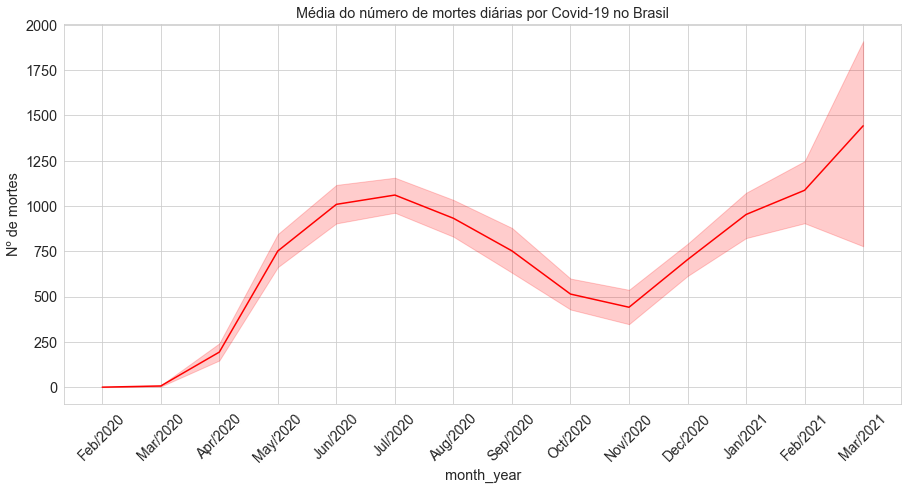

In [44]:
# Lineplot -> Média do número de mortes diárias por Covid-19 no Brasil
x = range(0,len(dados_brasil.index))
srn.lineplot(x=dados_brasil['month_year'],y=dados_brasil['new_deaths'], color = 'red')
plt.xticks(rotation=45,fontsize=14)

plt.ylabel("Nº de mortes")
plt.title("Média do número de mortes diárias por Covid-19 no Brasil")
plt.show()

In [46]:
# Captação de dados para o plot do Geoscatter.
continentes = pd.read_csv("continents2.csv", sep=',')
dados1 = dados.copy()


regioes = dados1.merge(continentes, left_on=['location'],right_on=['name'], how='left')
regioes.loc[:,'date'] = pd.to_datetime(regioes.loc[:,'date'])
regioes["day"] = regioes["date"].dt.day
regioes["month"] =regioes["date"].dt.month
regioes["year"] = regioes["date"].dt.year

mapa_paises = regioes.groupby(by = ['region', 'location', 'year','alpha-3']).mean().reset_index()
mapa_paises.rename(columns={'location': 'paises','region':'regiao','new_cases':'novos_casos','year':'ano'}, inplace = True)
mapa_paises

,regiao,paises,ano,alpha-3,total_cases,novos_casos,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,country-code,region-code,sub-region-code,intermediate-region-code,day,month
0,Africa,Algeria,2020,DZA,34030.144695,320.289389,316.987569,1214.810289,8.861736,8.798791,...,83.741,1.9,76.88,0.748,12.0,2.0,15.0,NaN,15.983923,7.411576
1,Africa,Algeria,2021,DZA,107246.129032,225.532258,234.262726,2887.274194,3.870968,3.988500,...,83.741,1.9,76.88,0.748,12.0,2.0,15.0,NaN,14.645161,1.548387
2,Africa,Angola,2020,AGO,4680.871080,61.160279,60.293676,128.285714,1.411150,1.398742,...,26.664,0.0,61.15,0.581,24.0,2.0,202.0,17.0,16.188153,7.797909
3,Africa,Angola,2021,AGO,19555.741935,54.354839,56.592210,463.000000,1.693548,1.700500,...,26.664,0.0,61.15,0.581,24.0,2.0,202.0,17.0,14.645161,1.548387
4,Africa,Benin,2020,BEN,1588.096220,11.171821,11.054959,25.951890,0.151203,0.151241,...,11.035,0.5,61.77,0.545,204.0,2.0,202.0,11.0,16.206186,7.731959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,Oceania,Samoa,2021,WSM,2.274194,0.016129,0.016145,0.000000,0.000000,0.000000,...,0.000,0.0,73.32,0.715,882.0,9.0,61.0,NaN,14.645161,1.548387
364,Oceania,Solomon Islands,2020,SLB,13.234568,0.209877,0.188741,0.000000,0.000000,0.000000,...,35.890,1.4,73.00,0.567,90.0,9.0,54.0,NaN,17.172840,11.135802
365,Oceania,Solomon Islands,2021,SLB,17.354839,0.016129,0.016145,0.000000,0.000000,0.000000,...,35.890,1.4,73.00,0.567,90.0,9.0,54.0,NaN,14.645161,1.548387
366,Oceania,Vanuatu,2020,VUT,1.000000,0.019231,0.005500,0.000000,0.000000,0.000000,...,25.209,0.0,70.47,0.609,548.0,9.0,54.0,NaN,17.615385,11.596154


In [48]:
fig = px.scatter_geo(mapa_paises, locations='alpha-3', color='regiao',
                     color_discrete_sequence = ('blue','red','pink','yellow','black','grey'),
                     hover_name="paises", size="novos_casos", size_max=20, opacity = 0.8,
                     animation_frame="ano",
                     projection="natural earth", title='Mapa Global - média de novos casos diários acumulados')

fig.show()